# Project: Investigate Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The intention of this project is to analyze the current movie dataset available. The movie data will be cleaned first and then analyzed along with some visual graphs. The two questions this project will investigate are 1) Which movies generated most revenue from year to year and create a visualization to see how this revenue fluctuate from year to year 2) What are some characteristics for movies generating the highest revenue. The second question will be divided into two component i) the correlation between movie popularity and movie revenue ii) the correlation between movie budget and movie revenue.


In [108]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("tmdb-movies.csv")

#understand data information, data type, null
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#check the data distribution's mean and max
df.describe().revenue_adj

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

### Data Cleaning - Remove columns not useful to the analysis and clear records that does not make sense

> The table contains some columns that are irrelevant to our analysis and they will be removed so that the dataset is clean and easy to work with

In [6]:
#remove columns that are not useful for investigation such as the homepage, tagline, overview, runtime, vote_count, vote_average, id,imdb_id
df_clean_v1 = df.drop(["homepage","tagline","overview", "runtime","vote_count", "vote_average","id","imdb_id"], axis=1)
df_clean_v1

,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,2015,1.609999e+08,7.854116e+08


In [7]:
#Only keep record where budget is greater than zero,
#this is under the assumption that the movie budget is more than zero dollars, otherwise nothing can be produced

df_clean_v2= df_clean_v1.query('budget_adj > 0')
df_clean_v2

,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,2015,1.609999e+08,7.854116e+08


In [110]:
#Only keep record where inventory is greater than zero,
#this is under the assumption that the movie produced should not receive a revenue of zero
df_clean_v3= df_clean_v2.query('revenue_adj > 0')
df_clean_v3

,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,2015,1.609999e+08,7.854116e+08


In [111]:
#check for duplicates
duplicate = df_clean_v3[df_clean_v3.duplicated()]
duplicate

,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,2010,30000000.0,967000.0


In [105]:
#remove duplicate and check the shape again
df_clean_v3 = df_clean_v3.drop_duplicates( keep='first')
df_clean_v3.shape

(3854, 13)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movies generated most revenue from year to year and create a visualization to see how this revenue fluctuate from year to year ?

In [106]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_v4 = df_clean_v3.groupby("release_year").max()[["original_title", "revenue_adj"]]

>Below is a list showing the movie that got the highest revenue in that year. The movie Zombieland generated the highest revenue amoung all years

In [107]:
df_v4

,original_title,revenue_adj
release_year,,
1960,The Magnificent Seven,4.423780e+08
1961,West Side Story,1.574815e+09
1962,To Kill a Mockingbird,5.045914e+08
1963,The Great Escape,5.617734e+08
1964,The Night of the Iguana,8.780804e+08
1965,Thunderball,1.129535e+09
1966,Who's Afraid of Virginia Woolf?,2.266436e+08
1967,You Only Live Twice,1.345551e+09
1968,Where Eagles Dare,3.555466e+08


>Create a visualization to see how every year's maximum movie revenue fluctuate from year to year:

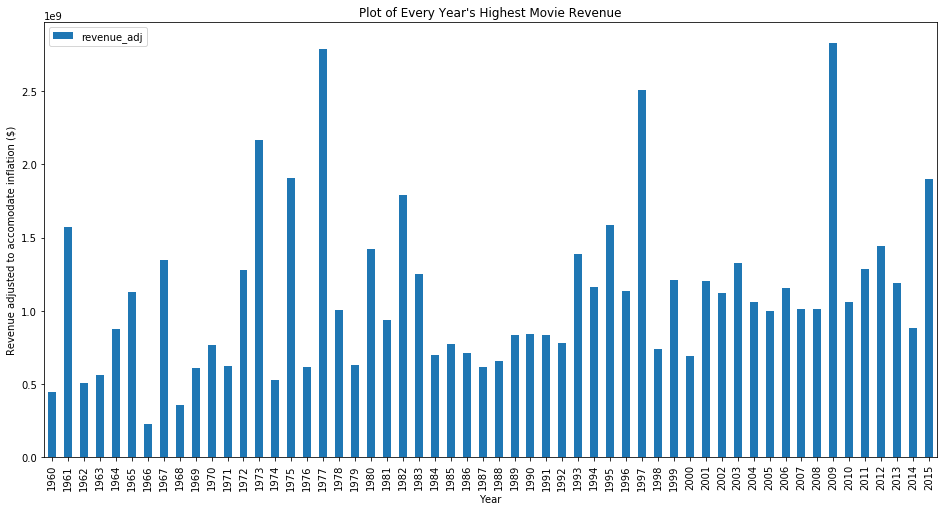

In [115]:
df_v4.plot(kind="bar", figsize= (16,8));
plt.title("Plot of Every Year's Highest Movie Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue adjusted to accomodate inflation ($)");

>It is evident from the plot that every year's highest movie revenue fluctuated a lot and there are no obvious trend to be obserbed from year to year. The movie produced in the year 2009 generated the highest revenue among the yearly maximum revenues and the movie produced in 1966 generated the lowest revenue among the yearly maximum revenues.

In [52]:
#look for the movie title in 2009 which generated the highest revenue among the maximum revenues
df_v4.query('release_year == 2009')

,original_title,revenue_adj
release_year,,
2009,Zombieland,2.827124e+09


In [40]:
#look for the movie title in 1966 which generated the lowest revenue among the maximum revenues
df_v4.query('release_year == 1966')

,original_title,revenue_adj
release_year,,
1966,Who's Afraid of Virginia Woolf?,2.266436e+08


### Research Question 2  (Correlation between popularity, budget with respect to revenue generated)
>For the list of movies which revenue is performing better than the average, we are trying to investigate 2 correlation related questions 1) is the popularity of a movie directly correlated to the renenue generate? i.e. more popular means more revenue 2) is the movie budget directly correlated to revenue generated? i.e. more movie budget generates more revenue 

>Look at the movies where revenue_adj is greater than the mean revenue_adj and do a query to generate a list of movies with revenue_adj performing better than the mean revenue

In [88]:
df_v5=df_clean_v3.query('revenue_adj >revenue_adj.mean()')

In [65]:
# look for some description of the movies that are peforming above average
df_v5.describe() 

,popularity,budget,revenue,release_year,budget_adj,revenue_adj
count,1121.000000,1.121000e+03,1.121000e+03,1121.000000,1.121000e+03,1.121000e+03
mean,2.128756,7.028040e+07,2.856022e+08,1999.790366,8.216328e+07,3.671328e+08
std,2.209869,5.641962e+07,2.446348e+08,12.435395,5.511559e+07,2.872469e+08
min,0.131526,1.130000e+02,2.500000e+07,1960.000000,2.248029e+02,1.371268e+08
25%,1.011185,2.600000e+07,1.472988e+08,1994.000000,3.885061e+07,1.859539e+08
50%,1.575742,5.800000e+07,2.072839e+08,2003.000000,7.270485e+07,2.678633e+08
75%,2.520912,1.000000e+08,3.451414e+08,2010.000000,1.139663e+08,4.370498e+08
max,32.985763,3.800000e+08,2.781506e+09,2015.000000,3.683713e+08,2.827124e+09


>Now that we know the maximum popularity is 32.985763 and maximum revenue is 2.827124e+09. One question we can try to answer is whether the most popular movie generates the most revenue? Look for the movie name that's the most popular:

In [66]:
# Query for the movie name that's most popular
df_v5.query('popularity >= 32.985763') 

,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


>The most popular movie is Jurassic World, but it did not generate the most revenue, now let's create a visualization and plot movie popularity and movie revenue to see if we can find a possible correlation between popularity and revenue

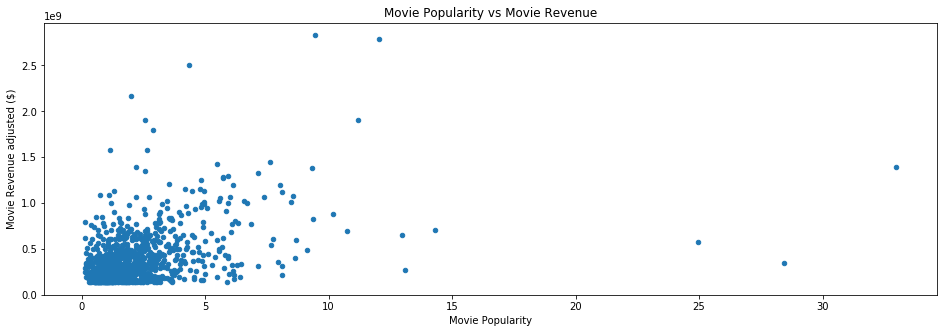

In [100]:
df_v5.plot(x='popularity', y='revenue_adj', kind= 'scatter', figsize= (16,5));
plt.title ("Movie Popularity vs Movie Revenue")
plt.xlabel ("Movie Popularity")
plt.ylabel("Movie Revenue adjusted ($)");

> Plot analysis: Looking at the plot above, as the popularity of a moive increases, the revenue does not necessarily increase as a result of popularity, there is no clear correlation between revenue and popularity of a moive. However, it is also evident from the plot that some of the movies with higher revenue tend to be on the higher end of the popularity spectrum. 

> Now let's see if we can find a correlation between movie budget and the movie's revenue:

In [89]:
# look for some description of the movies performing in the top50 percent in terms of revenue
df_v5.describe() 

,popularity,budget,revenue,release_year,budget_adj,revenue_adj
count,1121.000000,1.121000e+03,1.121000e+03,1121.000000,1.121000e+03,1.121000e+03
mean,2.128756,7.028040e+07,2.856022e+08,1999.790366,8.216328e+07,3.671328e+08
std,2.209869,5.641962e+07,2.446348e+08,12.435395,5.511559e+07,2.872469e+08
min,0.131526,1.130000e+02,2.500000e+07,1960.000000,2.248029e+02,1.371268e+08
25%,1.011185,2.600000e+07,1.472988e+08,1994.000000,3.885061e+07,1.859539e+08
50%,1.575742,5.800000e+07,2.072839e+08,2003.000000,7.270485e+07,2.678633e+08
75%,2.520912,1.000000e+08,3.451414e+08,2010.000000,1.139663e+08,4.370498e+08
max,32.985763,3.800000e+08,2.781506e+09,2015.000000,3.683713e+08,2.827124e+09


> Now that we know the maximum budget is 3.683713e+08 and the maximum revenue is 2.827124e+09, a question we can try to aswer is whether the most budget movie produces the highest revenue, find the movie name with the highest budget:

In [98]:
df_v5.query ("budget_adj >= 3.683712e+08")

,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
3375,4.95513,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,2011,3.683713e+08,9.904175e+08


> The movie with the highest budge is Pirates of the Caribbean: On Stranger Tides, however, it did not generate the highest revenue. Now let's create a visualization and plot movie budget and movie revenue to see if we can find a general trend between the two.

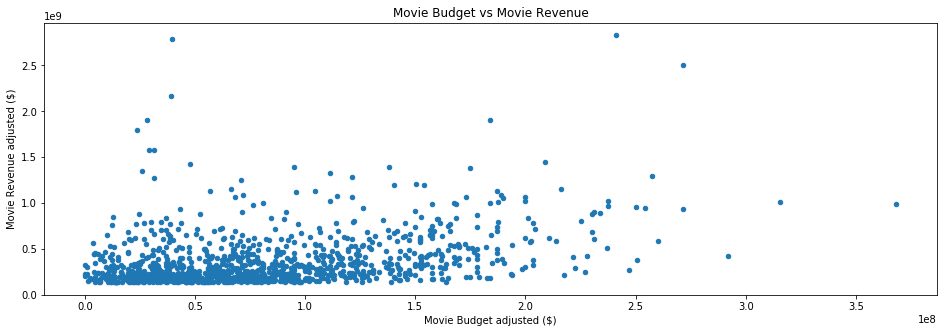

In [101]:
df_v5.plot(x='budget_adj', y='revenue_adj', kind= 'scatter', figsize= (16,5));
plt.title ("Movie Budget vs Movie Revenue")
plt.xlabel ("Movie Budget adjusted ($)")
plt.ylabel("Movie Revenue adjusted ($)");

>Plot analysis: Although the trend is not obvious, there is still a trend between the two variables. As the movie budget increases, we see there is also a general increase in the movie revenue. Although the highest budgeted movie did not generate the highest revenue, movies with high budgets tend to have a high revenue in general.

In [103]:
df_clean_v3.groupby(['director', 'release_year']).mean()

popularity       budget  \
director                      release_year                            
 FrÃ©dÃ©ric Jardin            2011            0.434506    2500000.0   
A.R. Murugadoss               2008            0.215030    9100000.0   
Aaron Blaise|Robert Walker    2003            1.653031  100000000.0   
Aaron Norris                  1995            0.018196    6000000.0   
Aaron Seltzer|Jason Friedberg 2006            0.698297   20000000.0   
Abbas Tyrewala                2008            0.193779    2300000.0   
Abe Sylvia                    2010            0.315527    4000000.0   
Abel Ferrara                  1990            0.592379    1000000.0   
                              1992            0.851712    1000000.0   
                              1993            0.682903   13000000.0   
Adam Green                    2010            0.296660    2500000.0   
Adam Marcus                   1993            0.504169    3000000.0   
Adam McKay                    2004            1.527154   26000000.0   
                              2006            0.912871   72500000.0   
                              2008            1.351237   65000000.0   
                              2010            1.419224  100000000.0   
                              2013            1.108437   50000000.0   
                              2015            4.648046   28000000.0   
Adam Rifkin                   1994            0.528782   26000000.0   
                              1999            0.637650   34000000.0   
Adam Shankman                 2001            0.798104   35000000.0   
                              2002            1.297822   11000000.0   
                              2003            0.476487   20000000.0   
                              2005            1.527417   58000000.0   
                              2007            1.019152   50000000.0   
                              2008            1.228370   80000000.0   
                              2012            1.161624   75000000.0   
Adam Wingard                  2014            0.916435    5000000.0   
Adrian Lyne                   1983            0.343668    4000000.0   
                              1986            1.161139   17000000.0   
...                                                ...          ...   
Woody Allen                   1985            0.617698   15000000.0   
                              1986            0.476819    6400000.0   
                              1989            0.415913   19000000.0   
                              1991            0.267440   14000000.0   
                              1993            0.755398   13500000.0   
                              1995            0.773291   15000000.0   
                              2005            1.051177   15000000.0   
                              2006            0.489898    4000000.0   
                              2008            0.866771   15000000.0   
                              2011            1.367727   30000000.0   
                              2012            0.714232   17000000.0   
                              2013            0.926390   18000000.0   
                              2015            1.007054   11000000.0   
Wych Kaosayananda             2002            0.455247   70000000.0   
Xavier Dolan                  2014            1.737699    4900000.0   
Xavier Gens                   2007            0.915514   24000000.0   
                              2011            0.189663    3000000.0   
Yorgos Lanthimos              2015            2.885126    4000000.0   
Zach Braff                    2004            0.586936    2500000.0   
                              2014            0.778247    5500000.0   
Zack Snyder                   2004            1.107167   28000000.0   
                              2007            2.191408   65000000.0   
                              2009            3.038063  130000000.0   
                              2010            0.914278   80000000.0 

<a id='conclusions'></a>
## Conclusions

> The two questions this project investigated are 1) Which movies generated most revenue from year to year and create a visualization to see how a movie's maximum revenue fluctuate from year to year 2) What are some characteristics for movies generating the highest revenue. The second question was divided into two components i) the correlation between movie popularity and movie revenue ii) the correlation between movie budget and movie revenue.

> With regards to questions 1: The dataframe df_v4 shows a list of movies that produced the highest revenue within that particular year, the movie Zombieland generated the highest revenue amoung all years. It is evident from the visualization that every year's highest movie revenue fluctuated a lot and there are no trend to be generalized. The movie produced in the year 2009 generated the highest revenue among the yearly maximum revenues and the movie produced in 1966 generated the lowest revenue among the yearly maximum revenues.

> With regards to question 2, the following conclusive remarks are produced: 
>The most popular movie is Jurassic World, but it did not generate the most revenue. As the popularity of a moive increases, the revenue does not necessarily increase as a result of popularity, there is no clear correlation between revenue and popularity of a moive. However, it is also evident from the plot that some of the movies with higher revenue tend to be on the higher end of the popularity spectrum. 

>The movie with the highest budge is Pirates of the Caribbean: On Stranger Tides, however, it did not generate the highest revenue. Although the trend is not obvious, there is still a trend between the two variables. As the movie budget increases, we see there is also a general increase in the movie revenue. Although the highest budgeted movie did not generate the highest revenue, movies with high budgets tend to have a high revenue in general.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])